In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import xgboost as xgb

In [2]:
df = pd.read_excel('GTEx_pancreas_liver_images_liverfat_pancreasfat.xlsx', index_col=0)
cols = [
    'Sex',
    'Age.Bracket',
    'Hardy.Scale',
    'Pathology.Categories_pancreas',
    'Pathology.Categories_liver',
    'Fat.Percentage_liver',
    'Fat.Percentage_pancreas'
       ]
df1 = df[cols]
df1

,Sex,Age.Bracket,Hardy.Scale,Pathology.Categories_pancreas,Pathology.Categories_liver,Fat.Percentage_liver,Fat.Percentage_pancreas
Subject.ID,,,,,,,
GTEX-1117F,female,60-69,Slow death,saponification,necrosis,28.672134,26.688684
GTEX-111FC,male,60-69,Fast death - violent,NaN,congestion,33.668883,9.667266
GTEX-111VG,male,60-69,Intermediate death,NaN,"fibrosis, inflammation",32.850612,43.050468
GTEX-113JC,female,50-59,Fast death - natural causes,NaN,steatosis,31.373621,5.533414
GTEX-117XS,male,60-69,Fast death - natural causes,NaN,"fibrosis, inflammation, steatosis",29.382420,45.074451
...,...,...,...,...,...,...,...
GTEX-ZYVF,female,50-59,Ventilator case,saponification,steatosis,30.932393,13.681926
GTEX-ZYW4,male,60-69,Intermediate death,NaN,fibrosis,34.370814,14.931241
GTEX-ZYWO,female,40-49,Ventilator case,NaN,NaN,19.809008,3.031982


In [3]:
df_test = pd.read_excel('GTEx_pancreas_liver_images_liverfat_pancreasfat_seq.xlsx', index_col=0)
test_cols = [
    'Sex',
    'Age.Bracket',
    'Hardy.Scale',
    'Pathology.Categories_pancreas',
    'Pathology.Categories_liver',
    'Fat,Percentage_liver',
    'Fat,Percentage_pancreas'
       ]
df_test = df_test[test_cols]

C:\Users\simon\Anaconda3\envs\biohackathon2020\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


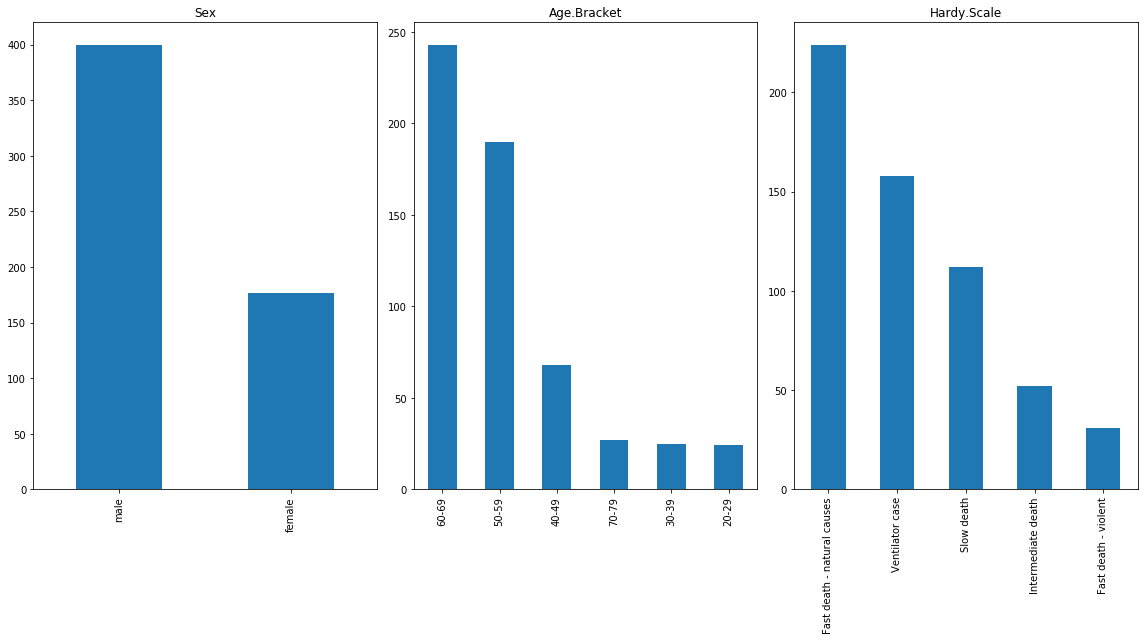

In [4]:
categorical_features = [
    'Sex',
    'Age.Bracket',
    'Hardy.Scale',
]

fig, ax = plt.subplots(1, len(categorical_features), figsize=(16,9))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)
    plt.tight_layout()
fig.show()

C:\Users\simon\Anaconda3\envs\biohackathon2020\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


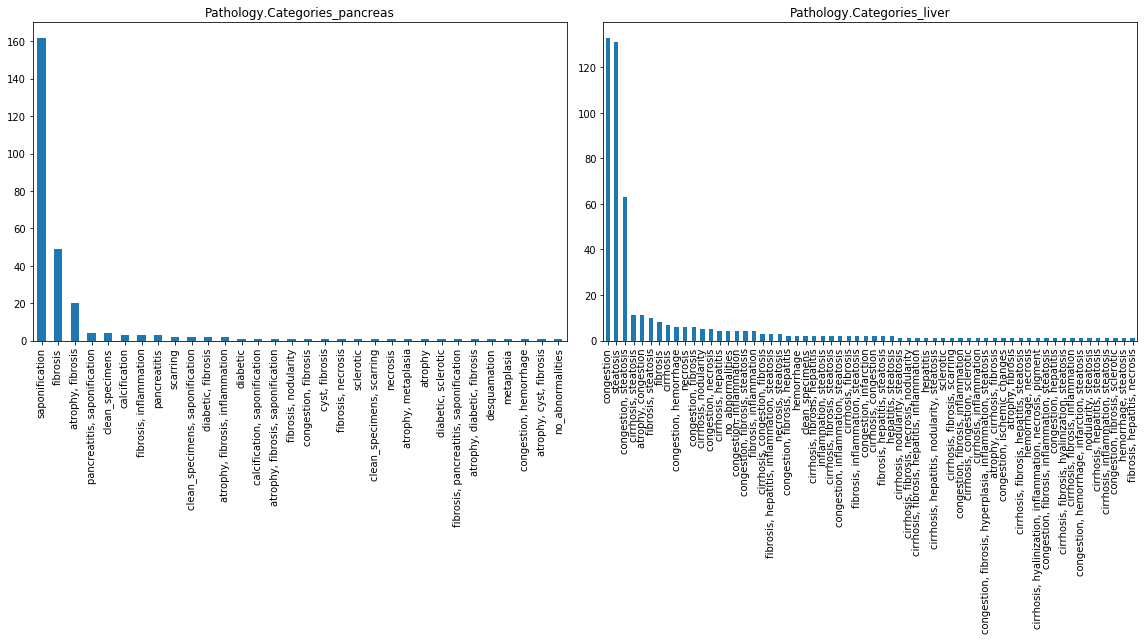

In [5]:
categorical_features = [
    'Pathology.Categories_pancreas',
    'Pathology.Categories_liver'
]

fig, ax = plt.subplots(1, len(categorical_features), figsize=(16,9))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)
    plt.tight_layout()
fig.show()

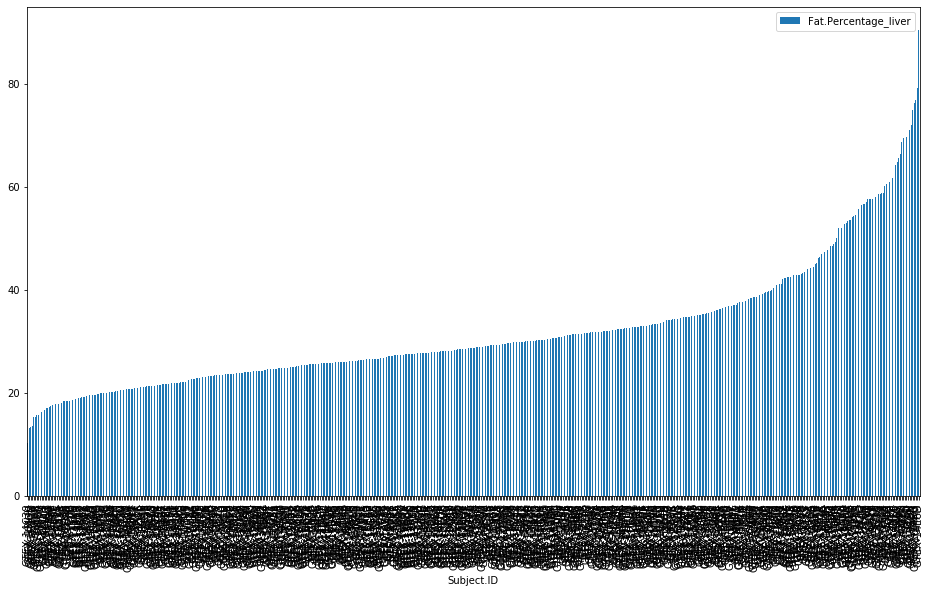

In [6]:
df[['Fat.Percentage_liver']].sort_values('Fat.Percentage_liver').plot(kind='bar', figsize=(16,9))

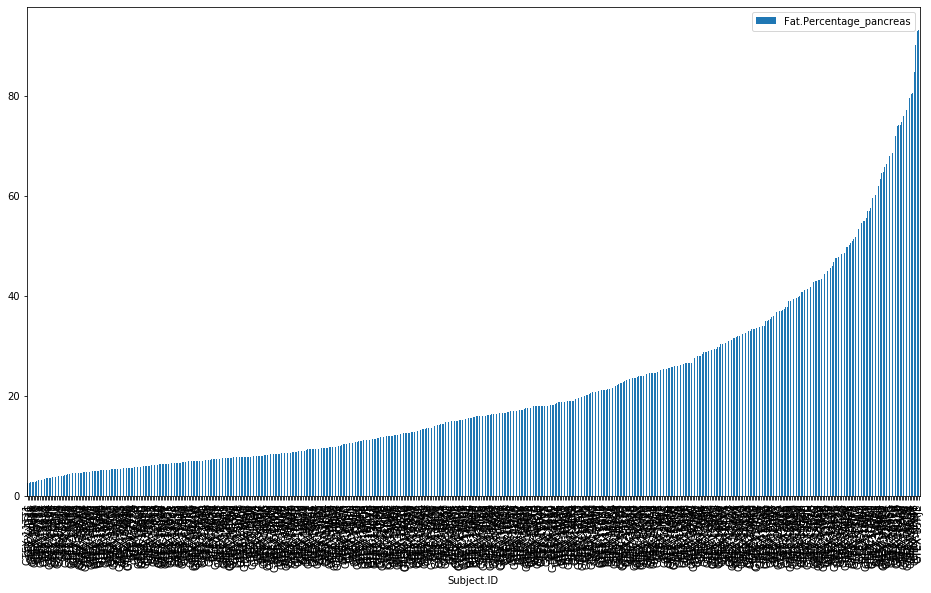

In [7]:
df[['Fat.Percentage_pancreas']].sort_values('Fat.Percentage_pancreas').plot(kind='bar', figsize=(16,9))

In [9]:
cols1 = [
    'Sex',
    'Age.Bracket',
    'Hardy.Scale',
    'Pathology.Categories_pancreas',
    'Pathology.Categories_liver',
       ]
X_train = df1[cols1]
y_train = df1['Fat.Percentage_liver']
X_test = df_test[cols1]
y_test = df_test['Fat,Percentage_liver']

In [13]:
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)
# xg_reg.fit(X_train,y_train)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Sex, Age.Bracket, Hardy.Scale, Pathology.Categories_pancreas, Pathology.Categories_liver

In [10]:
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# clf.predict(X_test)

ValueError: could not convert string to float: 'female'